In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import math

# Data set

In [2]:
x, y = load_iris(return_X_y=True)

In [3]:
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [4]:
df = pd.DataFrame(x, columns = feature_names)
df['target'] = y

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['target'].unique()
#0: Iris-setosa, 1: Iris-versicolor, 2: Iris-virginica

array([0, 1, 2], dtype=int64)

# Convert to Binary Classification Problem

If you feed multiclass classification problem to logistic regression, then it will build several binary classification models.

To make this study simple, I will ignore Iris-virginica classes.

In [7]:
df = df[df['target'] != 2]

In [8]:
df['target'].unique()

array([0, 1], dtype=int64)

In [9]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


# Normalize inputs

Features have units. They all represent length and width in centimeters. We can get rid of the units if we divide them to standard deviation values.

In [10]:
for feature_name in feature_names:
    #df[feature_name] = (df[feature_name] - df[feature_name].mean()) / df[feature_name].std()
    df[feature_name] = df[feature_name] / df[feature_name].std()

In [11]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
95,8.882678,6.301766,2.899422,2.119064,1
96,8.882678,6.091707,2.899422,2.295653,1
97,9.661861,6.091707,2.968456,2.295653,1
98,7.947660,5.251472,2.071016,1.942475,1
99,8.882678,5.881648,2.830388,2.295653,1


# Model

In [12]:
model = LogisticRegression(random_state=0).fit(df[feature_names].values, df['target'].values)

# Evaluate built model

In [13]:
print(model.score(df[feature_names].values, df['target'].values) * 100,"% on ",df.shape[0],"instances")

100.0 % on  100 instances


# Equation

In [14]:
w0 = model.intercept_[0]

In [15]:
w = w1, w2, w3, w4 = model.coef_[0]

In [16]:
"y = %f + (%f * x1) + (%f * x2) + (%f * x3) + (%f * x4)" % (w0, w1, w2, w3, w4)

'y = -0.102763 + (0.444753 * x1) + (-1.371312 * x2) + (1.544792 * x3) + (1.590001 * x4)'

# Prediction

In [17]:
idx = 99
x = df.iloc[idx][feature_names].values
#y = model.predict(x.reshape(1, -1))[0]
y = model.predict_proba(x.reshape(1, -1))[0]
print(y[1])

0.9782192589879745


In [18]:
def sigmoid(x):
    return 1 / (1 + pow(math.e, -x))

In [19]:
result = 0

result += w0
for i in range(0, 4):
    result += x[i] * w[i]

result = sigmoid(result)
print(result)

0.9782192589879745


# Interpretability

In [20]:
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

In [21]:
feature_importance

,feature,importance
3,petal_width,4.903752
2,petal_length,4.686994
0,sepal_length,1.560105
1,sepal_width,0.253774


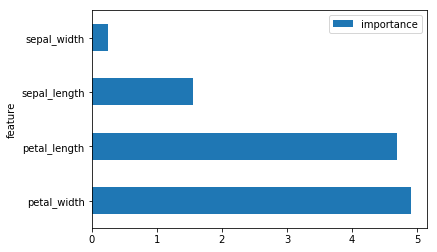

In [22]:
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()